In [29]:
# all imports
import pandas as pd
import numpy as np
import pingouin as pg
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
from pingouin import ancova
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Reading the dataset into pandas dataframe
df=pd.read_csv("diabetes (2).csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [30]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [31]:
#identifying rows with glucose=0
df2=df[df.Glucose == 0]
df2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [32]:
#Filtering main dataframe to remove rows with glucose=0
df=df[df.Glucose!=0]
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[763 rows x 9 columns]

In [33]:
#Categorizing Glucose and Pregnancies column
Glucose_brackets = [
    (df['Glucose'] <= 140),
    (df['Glucose'] >= 141) & (df['Glucose'] <= 199),
    (df['Glucose'] > 200) 
    ] 
Pregnancies_brackets = [
    (df['Pregnancies'] <= 3),
    (df['Pregnancies'] > 3) 
    ] 
Pregnancies_categories = ['3 or less' ,'More than 3']
Glucose_categories = ['Normal','Pre-Diabetic','Diabetic']
df['Glucose_Category'] = np.select(Glucose_brackets,Glucose_categories)
df['Pregnancies_category'] = np.select(Pregnancies_brackets,Pregnancies_categories)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Glucose_Category  \
0                       0.627   50        1     Pre-Diabetic   
1                       0.351   31        0           Normal   
2                       0.672   32        1     Pre-Diabetic   
3                       0.167   21        0           Normal   
4                       2.288   33        1           Normal   
..                        ...  ...      ...              ...   
763                     0.171   63        0           Normal   
764                     0.340   27        0           Normal   
765                     0.245   30        0           Normal   
766                     0.349   47        1           Normal   
767                     0.315   23        0           Normal   

    Pregnancies_category  
0            More than 3  
1              3 or less  
2            More than 3  
3              3 or less  
4              3 or less  
..                   ...  
763          More than 3  
764            3 or less  
765          More than 3  
766            3 or less  
767            3 or less  

[763 rows x 11 columns]

In [34]:
df['Glucose_Category'].value_counts()

Normal          571
Pre-Diabetic    192
Name: Glucose_Category, dtype: int64

In [35]:
df['Pregnancies_category'].value_counts()

3 or less      421
More than 3    342
Name: Pregnancies_category, dtype: int64

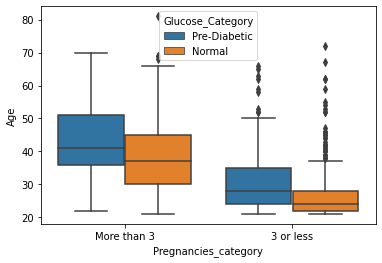

In [36]:
#Plots for exploratory analysis
sns.boxplot(hue='Glucose_Category',y='Age',x='Pregnancies_category',data=df)

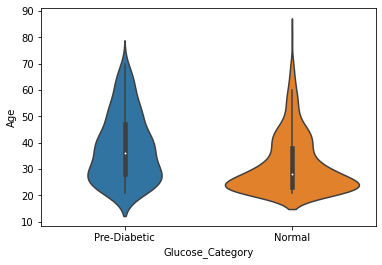

In [37]:

sns.violinplot(x="Glucose_Category", y="Age", data=df)


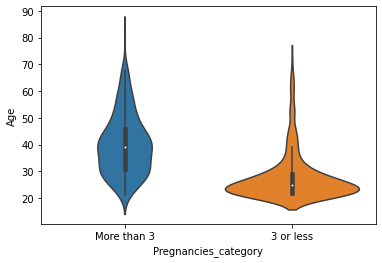

In [38]:
sns.violinplot(x="Pregnancies_category", y="Age", data=df)

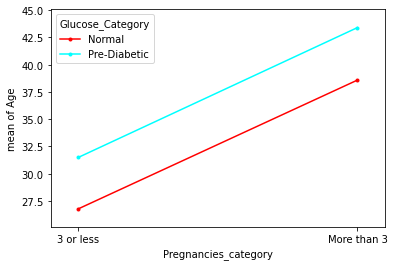

In [39]:
fig = interaction_plot(x=df['Pregnancies_category'], trace=df['Glucose_Category'], response=df['Age'])
plt.show()

In [40]:
#Performing t-tests for different categorical groups
Group1 = df.loc[df['Pregnancies_category'] == '3 or less', 'Age']
Group2 = df.loc[df['Pregnancies_category'] == 'More than 3', 'Age']
print(stats.ttest_ind(Group1,Group2).pvalue)

8.05249162982096e-55


In [41]:
Group3 = df.loc[df['Glucose_Category'] == 'Normal', 'Age']
Group4 = df.loc[df['Glucose_Category'] == 'Pre-Diabetic', 'Age']
print(stats.ttest_ind(Group3,Group4).pvalue)

1.948502752500759e-11


In [42]:
#preparing data for multiple linear regression
df2=df.copy()
Glucose_brackets = [
    (df2['Glucose'] <= 140),
    (df2['Glucose'] > 141) & (df2['Glucose'] <= 199),
    (df2['Glucose'] > 200) 
    ] 
Pregnancies_brackets = [
    (df2['Pregnancies'] <= 3),
    (df2['Pregnancies'] > 3) 
    ] 
Pregnancies_categories = [1,2]
Glucose_categories = [1,2,3]
df2['Glucose_Category'] = np.select(Glucose_brackets,Glucose_categories)
df2['Pregnancies_category'] = np.select(Pregnancies_brackets,Pregnancies_categories)
df2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_Category  \
0                       0.627   50        1                 2   
1                       0.351   31        0                 1   
2                       0.672   32        1                 2   
3                       0.167   21        0                 1   
4                       2.288   33        1                 1   
..                        ...  ...      ...               ...   
763                     0.171   63        0                 1   
764                     0.340   27        0                 1   
765                     0.245   30        0                 1   
766                     0.349   47        1                 1   
767                     0.315   23        0                 1   

     Pregnancies_category  
0                       2  
1                       1  
2                       2  
3                       1  
4                       1  
..                    ...  
763                     2  
764                     1  
765                     2  
766                     1  
767                     1  

[763 rows x 11 columns]

In [43]:
model = ols('Age ~ C(Glucose_Category) + C(Pregnancies_category) + C(Glucose_Category):C(Pregnancies_category)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F  \
C(Glucose_Category)                           3377.064779    2.0   17.433731   
C(Pregnancies_category)                      25718.554642    1.0  265.538505   
C(Glucose_Category):C(Pregnancies_category)      6.863487    2.0    0.035432   
Residual                                     73318.729622  757.0         NaN   

                                                   PR(>F)  
C(Glucose_Category)                          3.961137e-08  
C(Pregnancies_category)                      2.125414e-51  
C(Glucose_Category):C(Pregnancies_category)  9.651900e-01  
Residual                                              NaN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df2[['Glucose_Category','Pregnancies_category']]
y = df2['Age']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
#making predictions
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.4475469961754275
Mean Squared Error: 102.28497745779802
Root Mean Squared Error: 10.113603584173052


In [45]:
#getting intercept and coefficients
print(regressor.intercept_)
print(regressor.coef_)

10.853029491663428
[ 4.33653106 11.72744343]


In [46]:
#performing 2-way ANOVA using bioinfokit
res = stat()
res.anova_stat(df=df, res_var='Age', anova_model='Age~C(Glucose_Category)+C(Pregnancies_category)+C(Pregnancies_category):(Glucose_Category)')
res.anova_summary

df        sum_sq       mean_sq  \
C(Glucose_Category)                         1.0   3213.217354   3213.217354   
C(Pregnancies_category)                     1.0  28898.183528  28898.183528   
C(Pregnancies_category):Glucose_Category    2.0   3221.367142   1610.683571   
Residual                                  759.0  73481.290746     96.813295   

                                                   F        PR(>F)  
C(Glucose_Category)                        33.189836  1.214626e-08  
C(Pregnancies_category)                   298.493958  1.183589e-56  
C(Pregnancies_category):Glucose_Category   16.637008  8.482713e-08  
Residual                                         NaN           NaN

In [47]:
#Conducting Tukey post-hoc test
res = stat()
res.tukey_hsd(df=df, res_var='Age', xfac_var='Pregnancies_category', anova_model='Age~C(Glucose_Category)+C(Pregnancies_category)+C(Pregnancies_category):(Glucose_Category)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1     group2      Diff      Lower      Upper    q-value  p-value
0  More than 3  3 or less  12.37495  10.968848  13.781052  24.433336    0.001

In [48]:
res = stat()
res.tukey_hsd(df=df, res_var='Age', xfac_var='Glucose_Category', anova_model='Age~C(Glucose_Category)+C(Pregnancies_category)+C(Pregnancies_category):(Glucose_Category)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2     Diff     Lower     Upper    q-value  p-value
0  Pre-Diabetic  Normal  6.49969  4.888294  8.111086  11.198156    0.001

In [49]:

res = stat()
res.tukey_hsd(df=df, res_var='Age', xfac_var=['Pregnancies_category','Glucose_Category'], anova_model='Age~C(Glucose_Category)+C(Pregnancies_category)+C(Pregnancies_category):(Glucose_Category)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


group1                     group2       Diff  \
0  (More than 3, Pre-Diabetic)      (More than 3, Normal)   4.819726   
1  (More than 3, Pre-Diabetic)  (3 or less, Pre-Diabetic)  11.917097   
2  (More than 3, Pre-Diabetic)        (3 or less, Normal)  16.640382   
3        (More than 3, Normal)  (3 or less, Pre-Diabetic)   7.097372   
4        (More than 3, Normal)        (3 or less, Normal)  11.820656   
5    (3 or less, Pre-Diabetic)        (3 or less, Normal)   4.723284   

       Lower      Upper    q-value  p-value  
0   1.865168   7.774284   5.939947    0.001  
1   8.236193  15.598002  11.788776    0.001  
2  13.828185  19.452578  21.546188    0.001  
3   3.890830  10.303913   8.059599    0.001  
4   9.666289  13.975023  19.979039    0.001  
5   1.647420   7.799149   5.591517    0.001

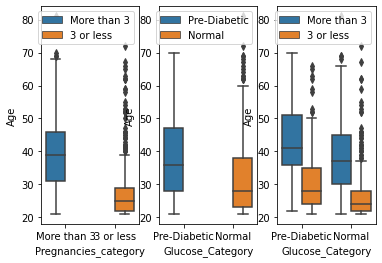

In [50]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(data=df, x="Pregnancies_category", y="Age", hue=df.Pregnancies_category.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Glucose_Category", y="Age", hue=df.Glucose_Category.tolist(), ax=axs[1])
sns.boxplot(data=df, x="Glucose_Category", y="Age", hue=df.Pregnancies_category.tolist(), ax=axs[2])
plt.show()

In [51]:
#ANCOVA
ancova(data=df2, dv='Age', covar='Glucose_Category', between='Pregnancies_category')

Source            SS   DF           F         p-unc       np2
0  Pregnancies_category  25694.465259    1  266.016616  1.672612e-51  0.259271
1      Glucose_Category   3294.485635    1   34.108043  7.725669e-09  0.042951
2              Residual  73408.172253  760         NaN           NaN       NaN

In [52]:
#ANCOVA post-hoc
pt = pg.pairwise_tukey(dv='Age',between='Pregnancies_category',effsize='cohen',data=df)
print(pt)

           A            B    mean(A)    mean(B)      diff        se  \
0  3 or less  More than 3  27.724466  40.099415 -12.37495  0.730838   

           T  p-tukey     cohen  
0 -16.932551      0.0 -1.232624  


In [53]:
#Power analysis
effect_size = -1.232624
alpha = 0.05 # significance level
power = 0.8
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 11.38


In [54]:
effect_size = -1.232624
alpha = 0.01 # significance level
power = 0.95
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.17


In [55]:
ancova(data=df2, dv='Age', covar='Pregnancies_category', between='Glucose_Category')

Source            SS   DF           F         p-unc       np2
0      Glucose_Category   3377.064779    2   17.478155  3.792648e-08  0.044028
1  Pregnancies_category  25718.554642    1  266.215139  1.586034e-51  0.259668
2              Residual  73325.593109  759         NaN           NaN       NaN

In [56]:
pt = pg.pairwise_tukey(dv='Age',between='Glucose_Category',effsize='cohen',data=df)
print(pt)

        A             B    mean(A)    mean(B)     diff        se         T  \
0  Normal  Pre-Diabetic  31.635727  38.135417 -6.49969  0.954069 -6.812599   

        p-tukey     cohen  
0  1.944078e-11 -0.568338  


In [57]:
effect_size = -0.568338
alpha = 0.05 # significance level
power = 0.8
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 49.58


In [58]:
effect_size = -0.568338
alpha = 0.05 # significance level
power = 0.95
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 81.43
